In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("data/greedy/Bertsekas.csv")
df['dataset'] = "Bertsekas\n(Naive)"
df

,dropped,rows,dataset
0,158,47,Bertsekas\n(Naive)
1,168,52,Bertsekas\n(Naive)
2,224,77,Bertsekas\n(Naive)
3,258,94,Bertsekas\n(Naive)
4,173,53,Bertsekas\n(Naive)
...,...,...,...
95,127,34,Bertsekas\n(Naive)
96,177,58,Bertsekas\n(Naive)
97,197,66,Bertsekas\n(Naive)
98,171,55,Bertsekas\n(Naive)


In [73]:
df2 = pd.read_csv("data/greedy/Lagoudakis.csv")
df2['dataset'] = "Lagoudakis\n(Naive)"
df2

,dropped,rows,dataset
0,117,30,Lagoudakis\n(Naive)
1,151,46,Lagoudakis\n(Naive)
2,122,32,Lagoudakis\n(Naive)
3,89,19,Lagoudakis\n(Naive)
4,138,38,Lagoudakis\n(Naive)
...,...,...,...
95,157,48,Lagoudakis\n(Naive)
96,95,22,Lagoudakis\n(Naive)
97,93,21,Lagoudakis\n(Naive)
98,167,51,Lagoudakis\n(Naive)


In [74]:
df3 = pd.read_csv("data/greedy/Dellacherie.csv")
df3['dataset'] = "Dellacherie\n(Naive)"
df3

,dropped,rows,dataset
0,95,21,Dellacherie\n(Naive)
1,67,11,Dellacherie\n(Naive)
2,105,25,Dellacherie\n(Naive)
3,61,7,Dellacherie\n(Naive)
4,51,3,Dellacherie\n(Naive)
...,...,...,...
95,56,7,Dellacherie\n(Naive)
96,80,15,Dellacherie\n(Naive)
97,96,22,Dellacherie\n(Naive)
98,61,8,Dellacherie\n(Naive)


In [75]:
df4 = pd.read_csv("data/greedy/test.csv")
df4['dataset'] = "Bohm\n(Naive)"
df4.mean()

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


dropped    210.85
 rows       70.34
dtype: float64

In [82]:
# concat = pd.concat([df4, df, df2, df3])
concat = pd.concat([test, df4, df, df2, df3])
grouped = concat.groupby("dataset")
dropped = grouped.mean().sort_values("dropped", ascending=False)
rows = grouped.mean().sort_values(" rows", ascending=False)
dropped

,dropped,rows
dataset,,
Bohm\n(Genetic),5621.30,2329.70
Bohm\n(Naive),210.85,70.34
Bertsekas\n(Naive),198.66,65.44
Lagoudakis\n(Naive),119.67,31.59
Dellacherie\n(Naive),75.20,13.46


In [78]:
std_drop = grouped.std().sort_values("dropped", ascending=False)['dropped']
std_row = grouped.std().sort_values("dropped", ascending=False)[' rows']
std_drop

dataset
Bohm\n(Genetic)         6198.450503
Bohm\n(Naive)             75.460924
Bertsekas\n(Naive)        71.382625
Lagoudakis\n(Naive)       34.446578
Dellacherie\n(Naive)      18.240813
Name: dropped, dtype: float64

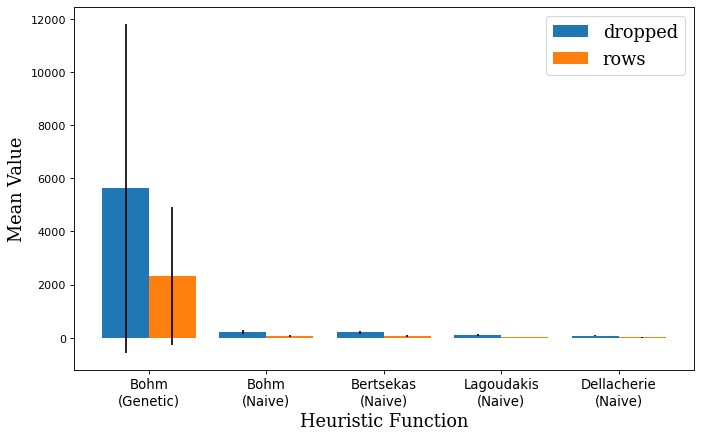

In [80]:
fig = plt.figure(figsize=(10, 6), dpi=80)

# ax = fig.add_axes([0,0,1,1])

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'serif',
#         'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

X_axis = np.arange(5)

plt.bar(X_axis - 0.2, dropped['dropped'], 0.4, yerr=std_drop, label="dropped")
plt.bar(X_axis + 0.2, rows[' rows'], 0.4, yerr=std_row, label="rows")
plt.xlabel("Heuristic Function", fontdict=font)
plt.xticks(X_axis, dropped.index, size=12)
plt.ylabel("Mean Value", fontdict=font)
plt.legend(prop=font2)
plt.savefig("greedy_dropped_comparison.png")

In [76]:
test = pd.read_csv("data/greedy/genetic_weights.csv")
test['dataset'] = "Bohm\n(Genetic)"
test

,dropped,rows,dataset
0,617,241,Bohm\n(Genetic)
1,7936,3287,Bohm\n(Genetic)
2,905,363,Bohm\n(Genetic)
3,404,153,Bohm\n(Genetic)
4,14623,6071,Bohm\n(Genetic)
5,20634,8579,Bohm\n(Genetic)
6,449,171,Bohm\n(Genetic)
7,7057,2926,Bohm\n(Genetic)
8,531,211,Bohm\n(Genetic)
9,4347,1801,Bohm\n(Genetic)


In [24]:
test.mean()

dropped    5621.3
 rows      2329.7
dtype: float64

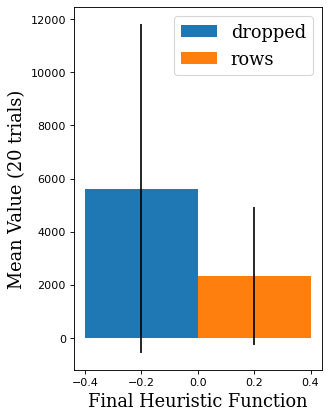

In [35]:
fig = plt.figure(figsize=(4, 6), dpi=80)

X_axis = 0

plt.bar(X_axis - 0.2, test.mean()['dropped'], 0.4, yerr=test.std()['dropped'], label="dropped")
plt.bar(X_axis + 0.2, test.mean()[' rows'], 0.4, yerr=test.std()[" rows"], label="rows")
plt.xlabel("Final Heuristic Function", fontdict=font)
plt.ylabel("Mean Value (20 trials)", fontdict=font)
plt.legend(prop=font2)

In [59]:
mean_final = pd.DataFrame(test.mean())
mean_final.columns = ["Bohm (genetic)"]
dropped_2 = dropped.append(mean_final.T)
dropped_2

,dropped,rows
Bohm,210.85,70.34
Bertsekas,198.66,65.44
Lagoudakis,119.67,31.59
Dellacherie,75.20,13.46
Bohm (genetic),5621.30,2329.70


In [58]:
dropped

,dropped,rows
dataset,,
Bohm,210.85,70.34
Bertsekas,198.66,65.44
Lagoudakis,119.67,31.59
Dellacherie,75.20,13.46


In [60]:
std_drop

dataset
Bohm           75.460924
Bertsekas      71.382625
Lagoudakis     34.446578
Dellacherie    18.240813
Name: dropped, dtype: float64

In [ ]:
grouped

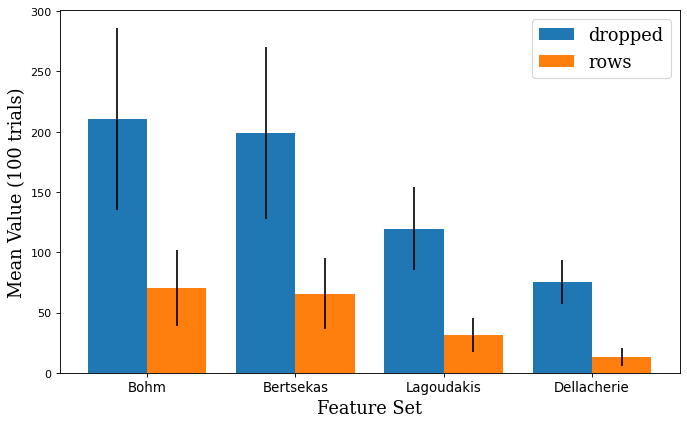

In [37]:
fig = plt.figure(figsize=(10, 6), dpi=80)

# ax = fig.add_axes([0,0,1,1])

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'serif',
#         'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

X_axis = np.arange(4)

plt.bar(X_axis - 0.2, dropped['dropped'], 0.4, yerr=std_drop, label="dropped")
plt.bar(X_axis + 0.2, rows[' rows'], 0.4, yerr=std_row, label="rows")
plt.xlabel("Feature Set", fontdict=font)
plt.xticks(X_axis, dropped.index, size=12)
plt.ylabel("Mean Value (100 trials)", fontdict=font)
plt.legend(prop=font2)